<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_6/NN_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import requests
import io

## Farsi Hand-written digits classification

In [0]:
'''
Let's import the Farsi digits (your assignment)
'''

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

In [0]:
print('Each image is of the form: {}'.format(X[0].shape ) )

Each image is of the form: (32, 32)


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [0]:
history = model.fit(X_train,Y_train, validation_split=0.25, epochs=5)

Train on 57573 samples, validate on 19191 samples
Epoch 1/5
57573/57573 [==============================] - 7s 119us/sample - loss: 0.1516 - acc: 0.9554 - val_loss: 0.0839 - val_acc: 0.9758
Epoch 2/5
57573/57573 [==============================] - 6s 104us/sample - loss: 0.0577 - acc: 0.9826 - val_loss: 0.0664 - val_acc: 0.9800
Epoch 3/5
57573/57573 [==============================] - 6s 105us/sample - loss: 0.0350 - acc: 0.9887 - val_loss: 0.0594 - val_acc: 0.9813
Epoch 4/5
57573/57573 [==============================] - 6s 104us/sample - loss: 0.0232 - acc: 0.9930 - val_loss: 0.0575 - val_acc: 0.9838
Epoch 5/5
57573/57573 [==============================] - 6s 104us/sample - loss: 0.0158 - acc: 0.9951 - val_loss: 0.0497 - val_acc: 0.9856


In [0]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

[[2518    0    0    2    1   14    0    0    1    0]
 [   0 2503    4    0    1    0    1    0    1    1]
 [   1    7 2406   59   19    0    7    1    0    0]
 [   0    0   30 2493   19    1    0    0    0    1]
 [   0    4    6   45 2620    8    4    2    2    1]
 [   6    2    0    4    2 2471    2    0    6    4]
 [   0    1    4    1    2    0 2591    1    3    5]
 [   3    3    6    3    3    3   15 2572    0    0]
 [   0    4    0    0    0    1    2    0 2534    7]
 [   0    8    1    1    6    0   33    0   10 2485]]


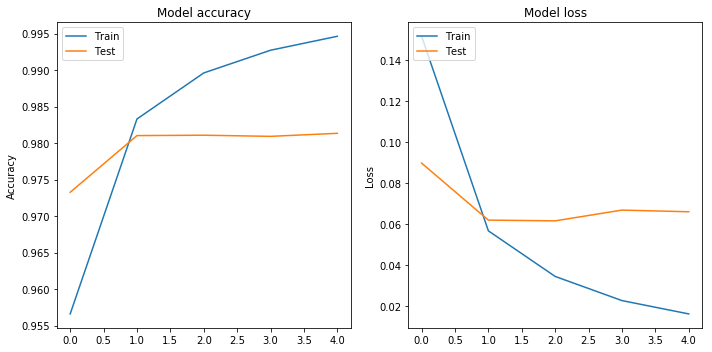

In [0]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [0]:
Y_oh = keras.utils.to_categorical(Y, num_classes=10, dtype=int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_oh, random_state=0)


## We need to change the loss function for the one-hot encoding
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train,Y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

In [0]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

In [0]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Try this for the particle identification problem.

In [2]:
import pandas as pd
url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    

# data = pd.read_csv('particle-identification-from-detector-responses.zip', compression='zip')
data.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [3]:
n_s = len(data)
targets = list(set(data['id']))
mini_data = data.sample(n_s, axis=0, random_state=0)
mini_data['target'] = mini_data['id'].apply(lambda x: targets.index(x)) 
mini_data.drop('id',axis=1, inplace=True)
mini_data.head()

,p,theta,beta,nphe,ein,eout,target
3748577,1.230330,0.415613,0.985857,0,0.182147,0.058503,1
4555504,0.870680,0.864884,0.989180,0,0.000000,0.000000,1
2388454,1.320670,0.481086,0.806984,0,0.151431,0.115267,2
3738046,0.657969,0.500238,0.982778,0,0.034974,0.055161,1
1572731,1.756310,0.340558,0.993275,0,0.030030,0.167452,1


In [0]:
Y = mini_data['target'].values
ind_to_keep = ['p', 'beta']
X = mini_data[ind_to_keep].values

In [5]:
model = keras.Sequential()
model = keras.Sequential([
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.build([None, 2])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  384       
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  16512     
_________________________________________________________________
dense_3 (Dense)              multiple                  516       
Total params: 33,924
Trainable params: 33,924
Non-trainable params: 0
_________________________________________________________________


In [0]:
Y_oh = keras.utils.to_categorical(Y, num_classes=4, dtype=int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_oh, random_state=0)

In [0]:
Y_train.shape

(3750000, 4)

In [7]:
history = model.fit(X_train,Y_train, validation_split=0.05, epochs=10 , batch_size=256, verbose=1)

Train on 3562500 samples, validate on 187500 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
3562500/3562500 [==============================] - 52s 15us/sample - loss: 0.1122 - acc: 0.9619 - val_loss: 0.0960 - val_acc: 0.9677
Epoch 2/10
3562500/3562500 [==============================] - 51s 14us/sample - loss: 0.0948 - acc: 0.9671 - val_loss: 0.0912 - val_acc: 0.9680
Epoch 3/10
3562500/3562500 [==============================] - 52s 15us/sample - loss: 0.0933 - acc: 0.9674 - val_loss: 0.3435 - val_acc: 0.8786
Epoch 4/10
3562500/3562500 [==============================] - 51s 14us/sample - loss: 0.0928 - acc: 0.9677 - val_loss: 0.0901 - val_acc: 0.9694
Epoch 5/10
3562500/3562500 [==============================] - 49s 14us/sample - loss: 0.0920 - acc: 0.9680 - val_loss: 0.0981 - val_acc: 0.9659
Epoch 6/10
3562500/3562500 [==============================] - 51s 14us/sample - loss: 0.0915 - acc: 0.9681 - val_loss: 0.0968 - val_acc: 0.9660
Epoch 7/10
3562500/3562500 [=======

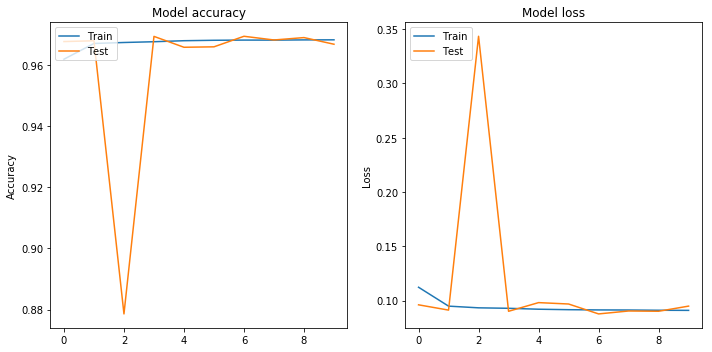

In [8]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

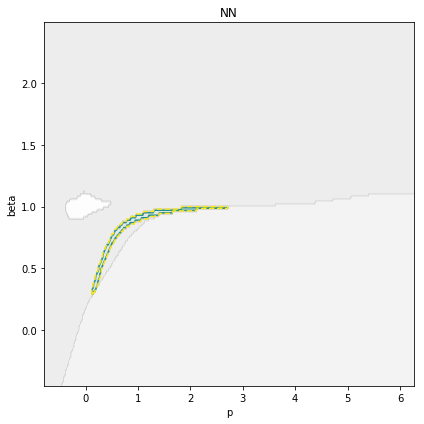

In [0]:
X0, X1 = X[:, 0], X[:, 1]
h=.02
x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max , h), np.arange(y_min, y_max , h) )

fig = plt.figure(figsize=(6,6))
# for clf in list(clf_dict.keys())[:]:
#     print(list(clf_dict.keys()).index(clf))
#     ax = plt.subplot(1, len(degrees), i + 1, xlabel=x_label, ylabel=y_label, title=plt_title)
ax = fig.add_subplot(1, 1, 1 , xlabel = ind_to_keep[0], ylabel=ind_to_keep[1], title = 'NN')

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
# print(np.shape(np.c_[xx.ravel(), yy.ravel()]))
# print(Z.shape)
# print(xx.shape)
# print(yy.shape)
Z = Z.reshape(xx.shape)
# ax.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.plasma, s=20)
ax.contour(xx, yy, Z,  levels=[-.5, 0, .5], linestyles=['--', '-', '--'])
ax.contourf(xx, yy, Z, alpha= .1, cmap = plt.cm.gray)
    
plt.tight_layout()
plt.show()

## Handling Overfitting


In [15]:
n_s = 10000
history_ovfit = model.fit(X_train[:n_s],Y_train[:n_s], 
                    validation_split=0.05, epochs=10 , 
                    batch_size=256, verbose=1)

Train on 9500 samples, validate on 500 samples
Epoch 1/10
9500/9500 [==============================] - 0s 16us/sample - loss: 0.0879 - acc: 0.9682 - val_loss: 0.0916 - val_acc: 0.9720
Epoch 2/10
9500/9500 [==============================] - 0s 15us/sample - loss: 0.0864 - acc: 0.9680 - val_loss: 0.0947 - val_acc: 0.9720
Epoch 3/10
9500/9500 [==============================] - 0s 15us/sample - loss: 0.0883 - acc: 0.9679 - val_loss: 0.0919 - val_acc: 0.9680
Epoch 4/10
9500/9500 [==============================] - 0s 15us/sample - loss: 0.0897 - acc: 0.9679 - val_loss: 0.0939 - val_acc: 0.9680
Epoch 5/10
9500/9500 [==============================] - 0s 16us/sample - loss: 0.0861 - acc: 0.9692 - val_loss: 0.0917 - val_acc: 0.9740
Epoch 6/10
9500/9500 [==============================] - 0s 16us/sample - loss: 0.0881 - acc: 0.9682 - val_loss: 0.0900 - val_acc: 0.9740
Epoch 7/10
9500/9500 [==============================] - 0s 16us/sample - loss: 0.0862 - acc: 0.9683 - val_loss: 0.0916 - val_acc: 0

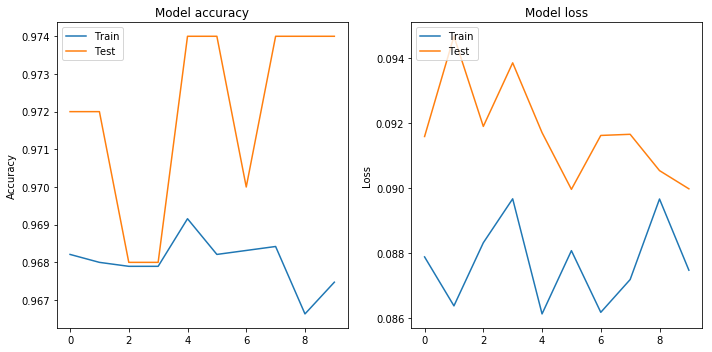

In [16]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history_ovfit.history['acc'])
plt.plot(history_ovfit.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history_ovfit.history['loss'])
plt.plot(history_ovfit.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
model_ovfit1 = keras.Sequential([
    keras.layers.Dense(128,activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001) ),
    keras.layers.Dense(128,activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])


model_ovfit1.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_ovfit1.build([None, 2])
model_ovfit1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  384       
_________________________________________________________________
dense_5 (Dense)              multiple                  16512     
_________________________________________________________________
dense_6 (Dense)              multiple                  16512     
_________________________________________________________________
dense_7 (Dense)              multiple                  516       
Total params: 33,924
Trainable params: 33,924
Non-trainable params: 0
_________________________________________________________________


Train on 9500 samples, validate on 500 samples
Epoch 1/10
9500/9500 [==============================] - 0s 39us/sample - loss: 1.2298 - acc: 0.5839 - val_loss: 0.9020 - val_acc: 0.6200
Epoch 2/10
9500/9500 [==============================] - 0s 17us/sample - loss: 0.8100 - acc: 0.6729 - val_loss: 0.7378 - val_acc: 0.7200
Epoch 3/10
9500/9500 [==============================] - 0s 16us/sample - loss: 0.6833 - acc: 0.7935 - val_loss: 0.6237 - val_acc: 0.8180
Epoch 4/10
9500/9500 [==============================] - 0s 16us/sample - loss: 0.5668 - acc: 0.8575 - val_loss: 0.5036 - val_acc: 0.8500
Epoch 5/10
9500/9500 [==============================] - 0s 17us/sample - loss: 0.4497 - acc: 0.9040 - val_loss: 0.4277 - val_acc: 0.8840
Epoch 6/10
9500/9500 [==============================] - 0s 16us/sample - loss: 0.3791 - acc: 0.9275 - val_loss: 0.3800 - val_acc: 0.9380
Epoch 7/10
9500/9500 [==============================] - 0s 15us/sample - loss: 0.3403 - acc: 0.9361 - val_loss: 0.3665 - val_acc: 0

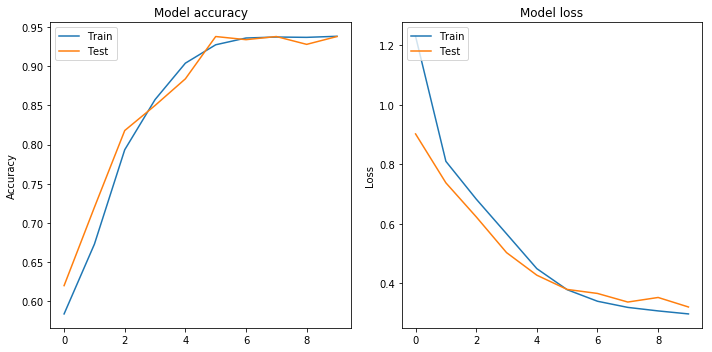

In [18]:
history_ovfit1 = model_ovfit1.fit(X_train[:n_s],Y_train[:n_s], 
                    validation_split=0.05, epochs=10 , 
                    batch_size=256, verbose=1)
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history_ovfit1.history['acc'])
plt.plot(history_ovfit1.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history_ovfit1.history['loss'])
plt.plot(history_ovfit1.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Train on 9500 samples, validate on 500 samples
Epoch 1/10
9500/9500 [==============================] - 0s 44us/sample - loss: 0.9995 - acc: 0.5331 - val_loss: 0.7749 - val_acc: 0.5740
Epoch 2/10
9500/9500 [==============================] - 0s 17us/sample - loss: 0.7764 - acc: 0.6315 - val_loss: 0.6831 - val_acc: 0.7220
Epoch 3/10
9500/9500 [==============================] - 0s 17us/sample - loss: 0.6950 - acc: 0.6806 - val_loss: 0.6499 - val_acc: 0.7600
Epoch 4/10
9500/9500 [==============================] - 0s 17us/sample - loss: 0.6490 - acc: 0.7382 - val_loss: 0.6045 - val_acc: 0.7800
Epoch 5/10
9500/9500 [==============================] - 0s 16us/sample - loss: 0.6030 - acc: 0.7711 - val_loss: 0.5441 - val_acc: 0.8120
Epoch 6/10
9500/9500 [==============================] - 0s 17us/sample - loss: 0.5325 - acc: 0.8187 - val_loss: 0.4285 - val_acc: 0.8640
Epoch 7/10
9500/9500 [==============================] - 0s 17us/sample - loss: 0.4405 - acc: 0.8555 - val_loss: 0.3258 - val_acc: 0

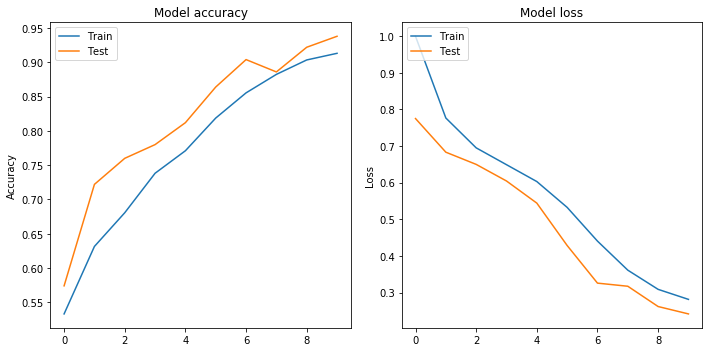

In [20]:
model_ovfit2 = keras.Sequential([
    keras.layers.Dense(128,activation=tf.nn.relu ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation=tf.nn.relu ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation=tf.nn.relu ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])


model_ovfit2.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history_ovfit2 = model_ovfit2.fit(X_train[:n_s],Y_train[:n_s], 
                    validation_split=0.05, epochs=10 , 
                    batch_size=256, verbose=1)

# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history_ovfit2.history['acc'])
plt.plot(history_ovfit2.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history_ovfit2.history['loss'])
plt.plot(history_ovfit2.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()